In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

/Users/jnai/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df1 = np.log(pd.read_csv("Crude_Oil_monthly_10.csv", usecols=["Price_Oil"]))

df2 = np.log(pd.read_csv("USD_JPY_monthly_10.csv", usecols=["Price_JPY"]))

df3 = pd.read_csv("Nikkei_monthly_10.csv", usecols=["Price_Nikkei"])
df3['Price_Nikkei'] = np.log(df3['Price_Nikkei'].str.replace(',','').astype(float))

df4 = np.log(pd.read_csv("Exp_JP.csv", usecols=["Exp_JP"]))

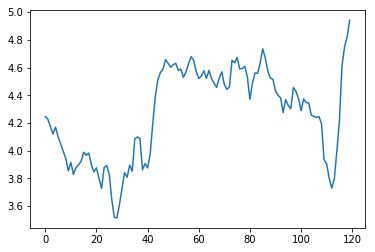

In [17]:
df1
plt.plot(df1)
plt.show()

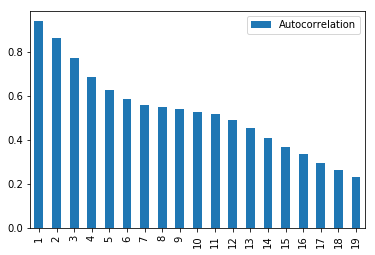

In [3]:
# Auto Corrilation function
acf_1 = acf(df1)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

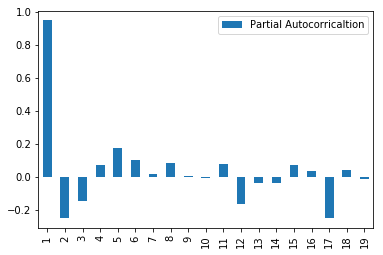

In [7]:
# Partial Auto Corrilation Function
pacf_1 = pacf(df1)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorricaltion']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

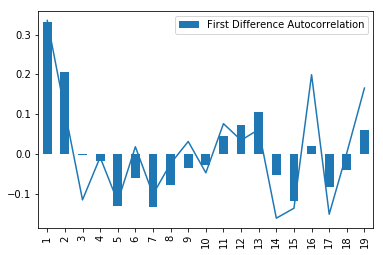

In [10]:
df1_diff = df1 - df1.shift()
diff = df1_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

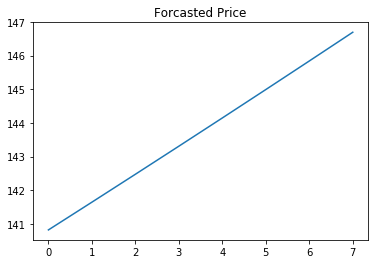

In [21]:
price_matrix=df1.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())
predictions = model_fit.predict (127, 127, typ='levels')
predictions
predictions_adjusted = np.exp(predictions)
predictions_adjusted
plt.plot(predictions_adjusted)
plt.title('Forcasted Price')
plt.show()